# 二重矢板の予測

In [1]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn import preprocessing
import japanize_matplotlib

## 1.CSVファイルの読み込み

In [2]:
#データの読み込み
data_folder = input("データファイルのあるフォルダまでのパス")
data_folder = data_folder.rstrip()
data_folder = data_folder.replace("\\", "/") + "/"

file1 = data_folder + "train_data1.csv"
file2 = data_folder + "train_labels.csv"

df1 = pd.read_csv(file1,encoding="cp932")
df2 = pd.read_csv(file2,encoding="cp932")

df = pd.concat([df1,df2],axis = 1)

In [3]:
pd.set_option('display.max_columns',30)
df.head()

,堤体延長,堤体幅,左右壁体高さ,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,...,引張材直径,引張材材料番号,腹起し材質,堤外側水位_常時,堤内側水位_常時,せん断変形破壊,滑動、支持力,根入れ部の安定,遮水効果,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査,矢板の全長,引張材位置,腹起し番号
0,20,5.7,4.0,3.9,0.0,0.0,1.6,12,1,7,24,165,179400,12,1,...,35,1,1,0.1,0.0,0.001200,0.016980,0.001000,0.030435,0.000000,0.000000,0.000000,6.9,0.5,6
1,29,8.2,6.8,6.7,3.1,0.0,1.6,20,0,28,7,242,59700,13,0,...,67,0,1,4.3,0.0,0.027998,0.074074,0.049689,0.693069,0.055319,0.023256,0.010811,12.0,5.7,5
2,23,13.3,9.7,9.6,0.0,0.8,1.6,18,1,27,7,136,139100,17,0,...,28,1,0,8.4,0.1,0.237154,0.195440,0.236220,1.250000,0.353191,1.818182,0.614286,13.3,7.1,1
3,13,10.6,8.5,8.4,0.0,1.0,1.6,12,0,11,21,272,118900,15,1,...,90,1,1,3.0,0.2,0.001200,0.030083,0.020192,0.360825,0.005556,0.000000,0.000000,12.4,4.9,3
4,17,11.8,5.9,5.8,0.0,0.9,0.8,16,0,21,35,10,59000,15,0,...,40,1,1,5.5,0.4,0.070217,0.268456,0.235756,0.498575,0.046809,0.078431,0.016216,15.7,2.7,2


## ラベルエンコーディング

In [4]:
df['矢板型'] = df['矢板型'].apply(str)
df['矢板材料'] = df['矢板材料'].apply(str)

In [5]:
df = pd.get_dummies(df)
print(df.shape)

(8928, 38)


In [6]:
pd.set_option('display.max_columns',35)
df.head()

,堤体延長,堤体幅,左右壁体高さ,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,中詰めN値,中詰め摩擦角,...,堤外側水位_常時,堤内側水位_常時,せん断変形破壊,滑動、支持力,根入れ部の安定,遮水効果,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査,矢板の全長,引張材位置,腹起し番号,矢板型_3,矢板型_4,矢板型_5,矢板材料_295,矢板材料_390
0,20,5.7,4.0,3.9,0.0,0.0,1.6,12,1,7,24,165,179400,12,1,20,42,...,0.1,0.0,0.001200,0.016980,0.001000,0.030435,0.000000,0.000000,0.000000,6.9,0.5,6,1,0,0,0,1
1,29,8.2,6.8,6.7,3.1,0.0,1.6,20,0,28,7,242,59700,13,0,43,28,...,4.3,0.0,0.027998,0.074074,0.049689,0.693069,0.055319,0.023256,0.010811,12.0,5.7,5,0,1,0,0,1
2,23,13.3,9.7,9.6,0.0,0.8,1.6,18,1,27,7,136,139100,17,0,35,22,...,8.4,0.1,0.237154,0.195440,0.236220,1.250000,0.353191,1.818182,0.614286,13.3,7.1,1,0,0,1,0,1
3,13,10.6,8.5,8.4,0.0,1.0,1.6,12,0,11,21,272,118900,15,1,42,34,...,3.0,0.2,0.001200,0.030083,0.020192,0.360825,0.005556,0.000000,0.000000,12.4,4.9,3,1,0,0,1,0
4,17,11.8,5.9,5.8,0.0,0.9,0.8,16,0,21,35,10,59000,15,0,2,27,...,5.5,0.4,0.070217,0.268456,0.235756,0.498575,0.046809,0.078431,0.016216,15.7,2.7,2,1,0,0,0,1


## 相関を調べる

In [7]:
# 目的変数の設定
pur = "矢板の全長"

In [8]:
sns.set(font='Yu Gothic',rc = {'figure.figsize':(200,200)})
sns.heatmap(df.corr(),square=True, vmax=1, vmin=-1, center=0,cmap='coolwarm')

<AxesSubplot:>

<AxesSubplot:>

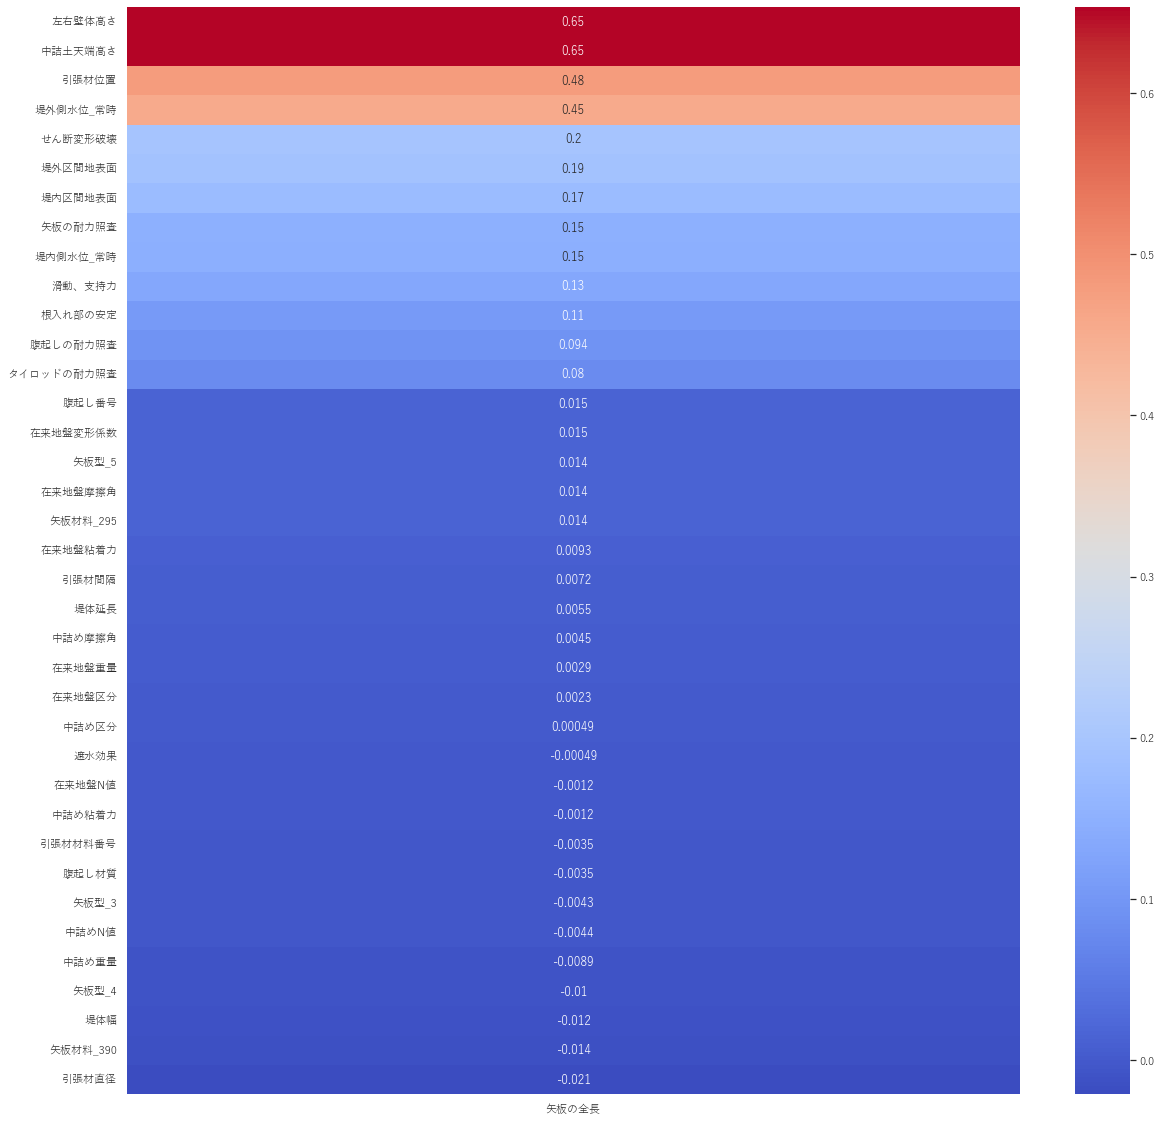

In [9]:
sns.set(font='Yu Gothic',rc = {'figure.figsize':(20,20)})
sns.heatmap(df.corr()[[pur]].sort_values(by=pur, ascending=False)[1:],cmap='coolwarm', annot=True)

In [10]:
df

,堤体延長,堤体幅,左右壁体高さ,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,中詰めN値,中詰め摩擦角,...,堤外側水位_常時,堤内側水位_常時,せん断変形破壊,滑動、支持力,根入れ部の安定,遮水効果,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査,矢板の全長,引張材位置,腹起し番号,矢板型_3,矢板型_4,矢板型_5,矢板材料_295,矢板材料_390
0,20,5.7,4.0,3.9,0.0,0.0,1.6,12,1,7,24,165,179400,12,1,20,42,...,0.1,0.0,0.001200,0.016980,0.001000,0.030435,0.000000,0.000000,0.000000,6.9,0.5,6,1,0,0,0,1
1,29,8.2,6.8,6.7,3.1,0.0,1.6,20,0,28,7,242,59700,13,0,43,28,...,4.3,0.0,0.027998,0.074074,0.049689,0.693069,0.055319,0.023256,0.010811,12.0,5.7,5,0,1,0,0,1
2,23,13.3,9.7,9.6,0.0,0.8,1.6,18,1,27,7,136,139100,17,0,35,22,...,8.4,0.1,0.237154,0.195440,0.236220,1.250000,0.353191,1.818182,0.614286,13.3,7.1,1,0,0,1,0,1
3,13,10.6,8.5,8.4,0.0,1.0,1.6,12,0,11,21,272,118900,15,1,42,34,...,3.0,0.2,0.001200,0.030083,0.020192,0.360825,0.005556,0.000000,0.000000,12.4,4.9,3,1,0,0,1,0
4,17,11.8,5.9,5.8,0.0,0.9,0.8,16,0,21,35,10,59000,15,0,2,27,...,5.5,0.4,0.070217,0.268456,0.235756,0.498575,0.046809,0.078431,0.016216,15.7,2.7,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,25,9.2,8.1,8.0,2.3,0.0,1.6,18,1,38,12,96,75100,13,0,1,43,...,5.2,0.0,0.004561,0.033315,0.015364,0.250896,0.038298,0.000000,0.000000,10.9,7.5,4,1,0,0,1,0
8924,29,10.4,5.4,5.3,1.5,0.0,0.8,12,1,48,26,134,15200,14,1,12,36,...,2.1,0.0,0.004561,0.033315,0.015364,0.250896,0.038298,0.000000,0.000000,14.1,4.3,3,1,0,0,0,1
8925,19,7.7,4.2,4.1,1.6,0.0,1.6,15,0,32,40,270,194100,11,1,19,3,...,3.0,0.0,0.020281,0.027162,0.014428,0.384615,0.022222,0.023256,0.007143,13.2,3.0,6,0,1,0,1,0
8926,11,11.5,4.3,4.2,1.6,0.0,0.8,18,1,12,37,85,14400,12,1,2,26,...,3.0,0.0,0.011119,0.048622,0.019118,0.371156,0.066667,0.078431,0.014286,11.9,2.0,4,0,0,1,1,0


## モデルの作成

### データの分割

In [11]:
# データの分割
# 全体の30%をテストデータに設定

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state = 3)

### 交差検証

In [12]:
# Stratified K Foldでデータを分割
from imblearn.under_sampling import RandomUnderSampler
# 目的変数と説明変数に分ける
X = train.drop([pur], axis = 1) # 予測対象以外を説明変数に設定
y = train.loc[:,pur]

# データの分割
# ライブラリのインポート
from sklearn.model_selection import KFold

fold = KFold(n_splits=5, shuffle=True, random_state=3) # データを5分割する
kf = fold.split(X, y)
kf_cv = list(kf)

In [13]:
for i, (idx_train, idx_val) in enumerate(kf_cv):
    print(f'fold {i}')
    print(idx_train)
    print(idx_val)
    print('=='*30)
    print(len(idx_train), len(idx_val)) #5分割しているのでデータ数が1:4になるか確認する
    print('=='*30)

fold 0
[   1    2    3 ... 6245 6246 6247]
[   0    8    9 ... 6225 6235 6248]
4999 1250
fold 1
[   0    1    2 ... 6245 6247 6248]
[   4    6   18 ... 6240 6242 6246]
4999 1250
fold 2
[   0    1    2 ... 6246 6247 6248]
[   3    5   16 ... 6241 6243 6244]
4999 1250
fold 3
[   0    3    4 ... 6244 6246 6248]
[   1    2   10 ... 6238 6245 6247]
4999 1250
fold 4
[   0    1    2 ... 6246 6247 6248]
[   7   13   14 ... 6230 6231 6232]
5000 1249


## xgboost

In [14]:
# from xgboost.callback import early_stop
import xgboost as xgb
from sklearn import metrics # 正解率を出すためのライブラリ
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold,cross_val_score

### ハイパーパラメータチューニング

In [15]:
import optuna
def objective(trial,df_X,df_y):
    
    params ={
    'max_depth':trial.suggest_int("max_depth",1,10),
    'min_child_weight':trial.suggest_int('min_child_weight',1,15),
    'gamma':trial.suggest_uniform('gamma',0,5),
    'subsample':trial.suggest_uniform('subsample',0,1),
    'colsample_bytree':trial.suggest_uniform('colsample_bytree',0.5,1),
    'reg_alpha':trial.suggest_uniform('subsample',0,1),
    'reg_lambda':trial.suggest_uniform('subsample',0,1),
    'learning_rate':trial.suggest_uniform('learning_rate',0,1) 
    }

    model = xgb.XGBRegressor(n_estimators=100,
                            verbosity=0,
                            n_jobs=-1,
                            random_state=42,
                            **params)

    #交差検証
    scores = cross_val_score(model, df_X, df_y, scoring='neg_mean_squared_error',cv=5)
    rmse = np.sqrt(-scores)
    score_mean = np.mean(rmse)

    return score_mean

In [16]:
#optuna.create_study()でoptuna.studyインスタンスを作る。
study = optuna.create_study()

#studyインスタンスのoptimize()に作った関数を渡して最適化する。
study.optimize(lambda trial: objective(trial,X,y),n_trials=200, timeout=300)

[I 2022-08-15 20:40:54,858] A new study created in memory with name: no-name-2342b31f-e53f-4fb9-a6fa-848b1a3c17e7
[I 2022-08-15 20:40:56,480] Trial 0 finished with value: 2.479945127647066 and parameters: {'max_depth': 9, 'min_child_weight': 12, 'gamma': 1.0924180926985465, 'subsample': 0.7477541035897071, 'colsample_bytree': 0.6500098938072462, 'learning_rate': 0.7123769313449495}. Best is trial 0 with value: 2.479945127647066.
[I 2022-08-15 20:40:57,062] Trial 1 finished with value: 4.096014419586018 and parameters: {'max_depth': 4, 'min_child_weight': 1, 'gamma': 1.1168855369451407, 'subsample': 0.0951351196465875, 'colsample_bytree': 0.8355668758801628, 'learning_rate': 0.4246009596897179}. Best is trial 0 with value: 2.479945127647066.
[I 2022-08-15 20:40:57,788] Trial 2 finished with value: 2.047242935728005 and parameters: {'max_depth': 3, 'min_child_weight': 4, 'gamma': 3.1606332467290765, 'subsample': 0.6406045935866205, 'colsample_bytree': 0.9957640983620089, 'learning_rate':

In [17]:
#スコアを見る
print(study.best_params)    

{'max_depth': 6, 'min_child_weight': 2, 'gamma': 1.9563690020502527, 'subsample': 0.9424178004897955, 'colsample_bytree': 0.9999870320966511, 'learning_rate': 0.13497828608440307}


In [18]:
print(study.best_value)

1.7599950570692962


In [19]:
xgb_params = {
    'objective': 'reg:squarederror',  # 回帰問題
    'eval_metric': 'rmse',       # 学習用の指標
}

In [20]:
xgb_params['max_depth'] = study.best_params['max_depth']
xgb_params['min_child_weight'] = study.best_params['min_child_weight']
xgb_params['gamma'] = study.best_params['gamma']
xgb_params['subsample'] = study.best_params['subsample']
xgb_params['colsample_bytree'] = study.best_params['colsample_bytree']
xgb_params['learning_rate'] = study.best_params['learning_rate']
# xgb_params['reg_alpha'] = study.best_params['reg_alpha']
# xgb_params['reg_lambda'] = study.best_params['reg_lambda']

### 学習開始

In [21]:
import optuna
from sklearn.metrics import average_precision_score,mean_absolute_error
import shap

def fit_xgb(X, y, cv, params: dict=None):
    models = []
    ma = []
    oof = np.zeros(len(X))
    # oof_classfication = np.zeros(len(X))

    if params is None:
        params = {}

    threshold_all = []
    for i, (idx_train, idx_val) in enumerate(kf_cv):
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train] # 学習用の説明変数と目的変数の呼び出し
        X_val, y_val = X.iloc[idx_val], y.iloc[idx_val]

        reg = xgb.XGBRegressor(**params)
        model = reg.fit(X_train, y_train,
                        eval_set=[(X_val, y_val)],  
                        early_stopping_rounds=20,
                        verbose = 2)

        pred = model.predict(X_val)
        oof[idx_val] = pred

        # acc.append(metrics.accuracy_score(y_val, pred))

        # oof[idx_val] = pred
        models.append(model)
        
        explainer = shap.TreeExplainer(model = model,data=X_train,feature_perturbation="interventional")
        shap_values = explainer(X_train)
        shap.plots.bar(shap_values=shap_values,max_display=40)
        shap.plots.beeswarm(shap_values,max_display=40)
        
        print('r2_train:',reg.score(X_train, y_train))
        print('r2_val:',reg.score(X_val, y_val))
        print('MAE_val: ',mean_absolute_error(y_val, pred))
        ma.append(metrics.mean_absolute_error(y_val, pred))

    print(f'平均のMAE：{np.mean(ma)}')
    return oof, models

[0]	validation_0-rmse:9.94964
[2]	validation_0-rmse:7.62030
[4]	validation_0-rmse:5.90270
[6]	validation_0-rmse:4.67291
[8]	validation_0-rmse:3.79014
[10]	validation_0-rmse:3.17499
[12]	validation_0-rmse:2.75793
[14]	validation_0-rmse:2.48378
[16]	validation_0-rmse:2.30416
[18]	validation_0-rmse:2.18744
[20]	validation_0-rmse:2.10294
[22]	validation_0-rmse:2.04332
[24]	validation_0-rmse:2.00570
[26]	validation_0-rmse:1.97330
[28]	validation_0-rmse:1.94910
[30]	validation_0-rmse:1.93236
[32]	validation_0-rmse:1.91939
[34]	validation_0-rmse:1.91261
[36]	validation_0-rmse:1.90286
[38]	validation_0-rmse:1.89750
[40]	validation_0-rmse:1.88984
[42]	validation_0-rmse:1.88743
[44]	validation_0-rmse:1.87807
[46]	validation_0-rmse:1.87198
[48]	validation_0-rmse:1.86524
[50]	validation_0-rmse:1.86397
[52]	validation_0-rmse:1.85514
[54]	validation_0-rmse:1.85000


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[56]	validation_0-rmse:1.84673
[58]	validation_0-rmse:1.84194
[60]	validation_0-rmse:1.83696
[62]	validation_0-rmse:1.82759
[64]	validation_0-rmse:1.82625
[66]	validation_0-rmse:1.82509
[68]	validation_0-rmse:1.81812
[70]	validation_0-rmse:1.81793
[72]	validation_0-rmse:1.81572
[74]	validation_0-rmse:1.81196
[76]	validation_0-rmse:1.80753
[78]	validation_0-rmse:1.81094
[80]	validation_0-rmse:1.80922
[82]	validation_0-rmse:1.80889
[84]	validation_0-rmse:1.80620
[86]	validation_0-rmse:1.80438
[88]	validation_0-rmse:1.80166
[90]	validation_0-rmse:1.79855
[92]	validation_0-rmse:1.79853
[94]	validation_0-rmse:1.79741
[96]	validation_0-rmse:1.79491
[98]	validation_0-rmse:1.79371
[99]	validation_0-rmse:1.79212


 98%|===================| 4888/4999 [00:15<00:00]        

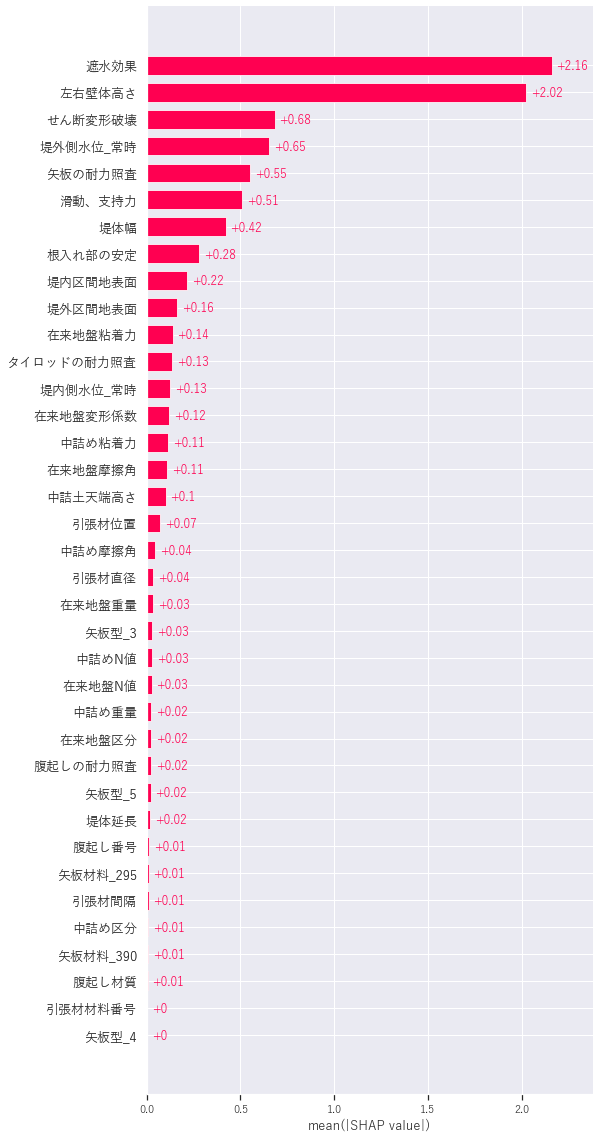

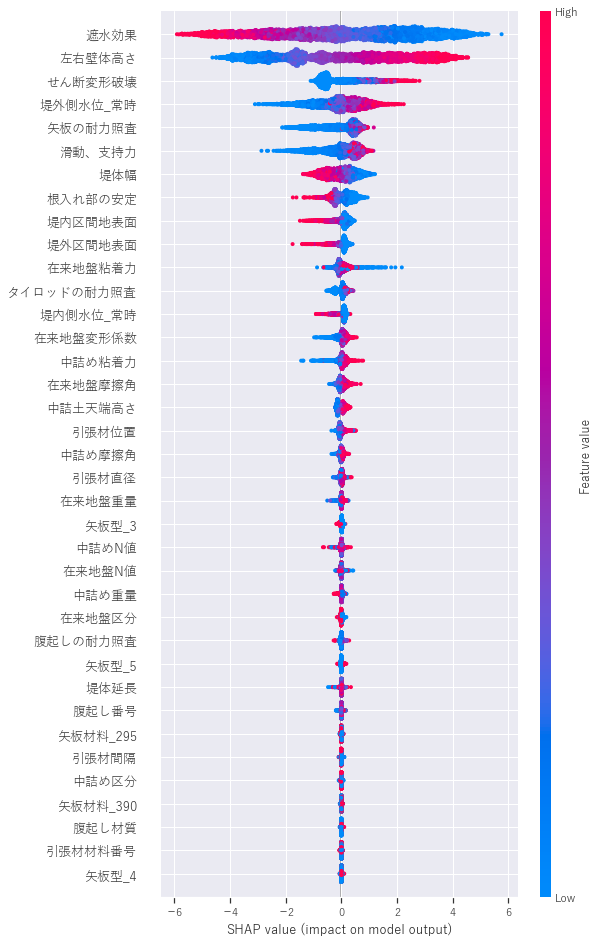

r2_train: 0.9573595377808688
r2_val: 0.7672533467433124
MAE_val:  1.3083588701152804
[0]	validation_0-rmse:9.97009
[2]	validation_0-rmse:7.63974
[4]	validation_0-rmse:5.92973
[6]	validation_0-rmse:4.68841
[8]	validation_0-rmse:3.80206
[10]	validation_0-rmse:3.18402
[12]	validation_0-rmse:2.76338
[14]	validation_0-rmse:2.48537
[16]	validation_0-rmse:2.30585
[18]	validation_0-rmse:2.17644
[20]	validation_0-rmse:2.09347
[22]	validation_0-rmse:2.03176
[24]	validation_0-rmse:1.99073
[26]	validation_0-rmse:1.96657
[28]	validation_0-rmse:1.95227
[30]	validation_0-rmse:1.94221
[32]	validation_0-rmse:1.93002
[34]	validation_0-rmse:1.91817
[36]	validation_0-rmse:1.91204
[38]	validation_0-rmse:1.90289
[40]	validation_0-rmse:1.89699
[42]	validation_0-rmse:1.88134
[44]	validation_0-rmse:1.87467
[46]	validation_0-rmse:1.87110
[48]	validation_0-rmse:1.86568
[50]	validation_0-rmse:1.85652
[52]	validation_0-rmse:1.84932


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[54]	validation_0-rmse:1.84777
[56]	validation_0-rmse:1.84655
[58]	validation_0-rmse:1.84131
[60]	validation_0-rmse:1.83795
[62]	validation_0-rmse:1.83522
[64]	validation_0-rmse:1.83006
[66]	validation_0-rmse:1.82117
[68]	validation_0-rmse:1.82113
[70]	validation_0-rmse:1.82027
[72]	validation_0-rmse:1.81796
[74]	validation_0-rmse:1.81879
[76]	validation_0-rmse:1.81623
[78]	validation_0-rmse:1.81443
[80]	validation_0-rmse:1.81237
[82]	validation_0-rmse:1.80774
[84]	validation_0-rmse:1.80479
[86]	validation_0-rmse:1.80031
[88]	validation_0-rmse:1.79853
[90]	validation_0-rmse:1.79555
[92]	validation_0-rmse:1.79585
[94]	validation_0-rmse:1.79681
[96]	validation_0-rmse:1.79484
[98]	validation_0-rmse:1.79341
[99]	validation_0-rmse:1.79331


 94%|=================== | 4693/4999 [00:14<00:00]       

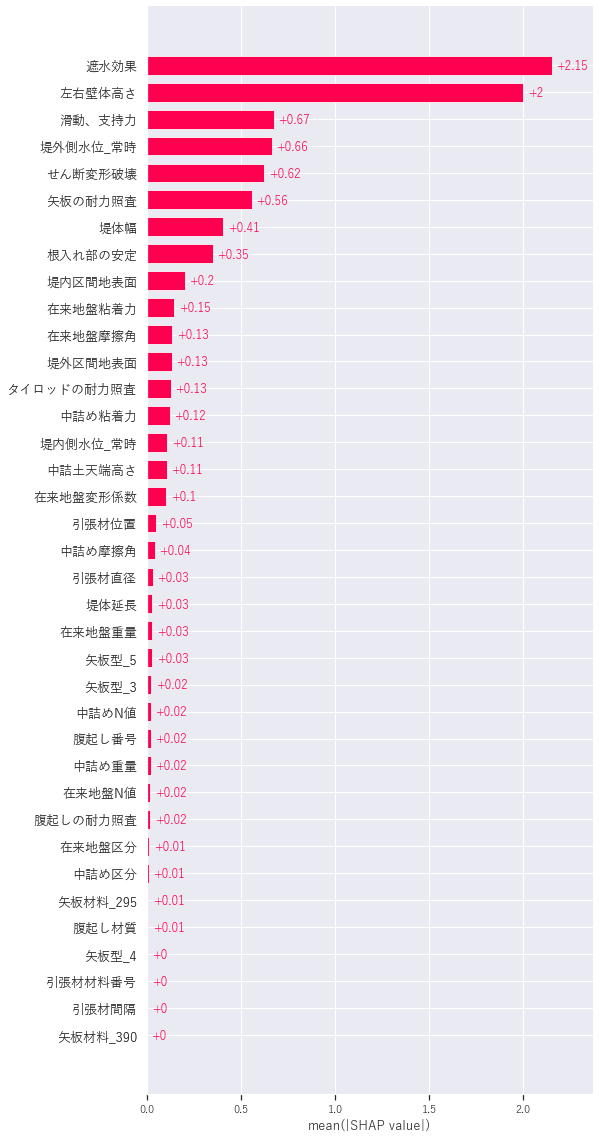

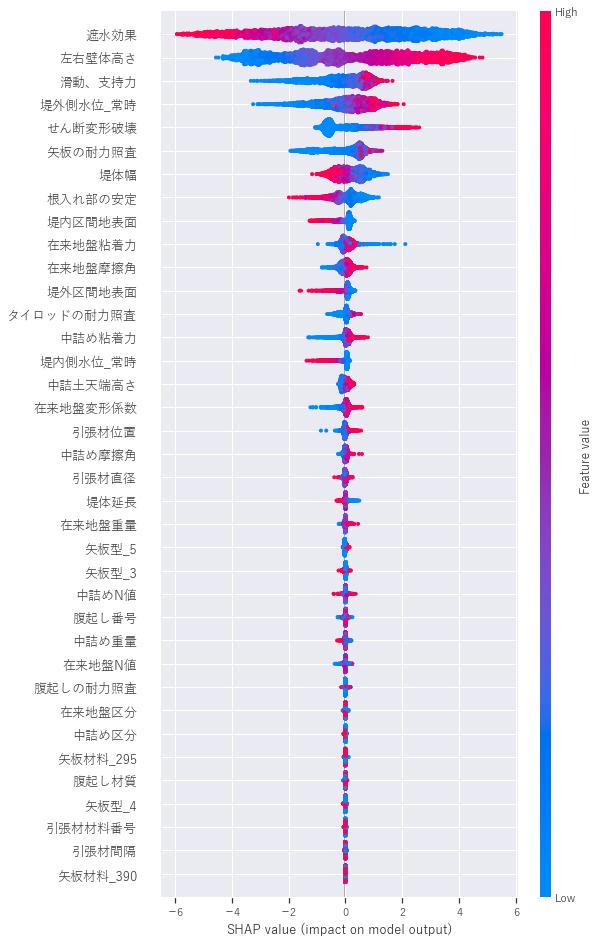

r2_train: 0.9518820354017572
r2_val: 0.7590194725907187
MAE_val:  1.3357800101089476
[0]	validation_0-rmse:9.87063
[2]	validation_0-rmse:7.56348
[4]	validation_0-rmse:5.86619
[6]	validation_0-rmse:4.62569
[8]	validation_0-rmse:3.74551
[10]	validation_0-rmse:3.11768
[12]	validation_0-rmse:2.69249
[14]	validation_0-rmse:2.40495
[16]	validation_0-rmse:2.21946
[18]	validation_0-rmse:2.08986
[20]	validation_0-rmse:1.99715
[22]	validation_0-rmse:1.93163
[24]	validation_0-rmse:1.89023
[26]	validation_0-rmse:1.85847
[28]	validation_0-rmse:1.83568
[30]	validation_0-rmse:1.81842
[32]	validation_0-rmse:1.80418
[34]	validation_0-rmse:1.79227
[36]	validation_0-rmse:1.78346
[38]	validation_0-rmse:1.76981
[40]	validation_0-rmse:1.76490
[42]	validation_0-rmse:1.76177
[44]	validation_0-rmse:1.76027
[46]	validation_0-rmse:1.75086


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[48]	validation_0-rmse:1.75262
[50]	validation_0-rmse:1.74256
[52]	validation_0-rmse:1.73741
[54]	validation_0-rmse:1.73261
[56]	validation_0-rmse:1.72004
[58]	validation_0-rmse:1.71224
[60]	validation_0-rmse:1.70381
[62]	validation_0-rmse:1.70223
[64]	validation_0-rmse:1.69951
[66]	validation_0-rmse:1.70018
[68]	validation_0-rmse:1.69713
[70]	validation_0-rmse:1.69498
[72]	validation_0-rmse:1.69468
[74]	validation_0-rmse:1.69080
[76]	validation_0-rmse:1.68563
[78]	validation_0-rmse:1.68114
[80]	validation_0-rmse:1.67325
[82]	validation_0-rmse:1.67031
[84]	validation_0-rmse:1.66966
[86]	validation_0-rmse:1.66984
[88]	validation_0-rmse:1.66714
[90]	validation_0-rmse:1.66519
[92]	validation_0-rmse:1.66419
[94]	validation_0-rmse:1.65742
[96]	validation_0-rmse:1.65605
[98]	validation_0-rmse:1.65288
[99]	validation_0-rmse:1.65199


100%|===================| 4982/4999 [00:15<00:00]        

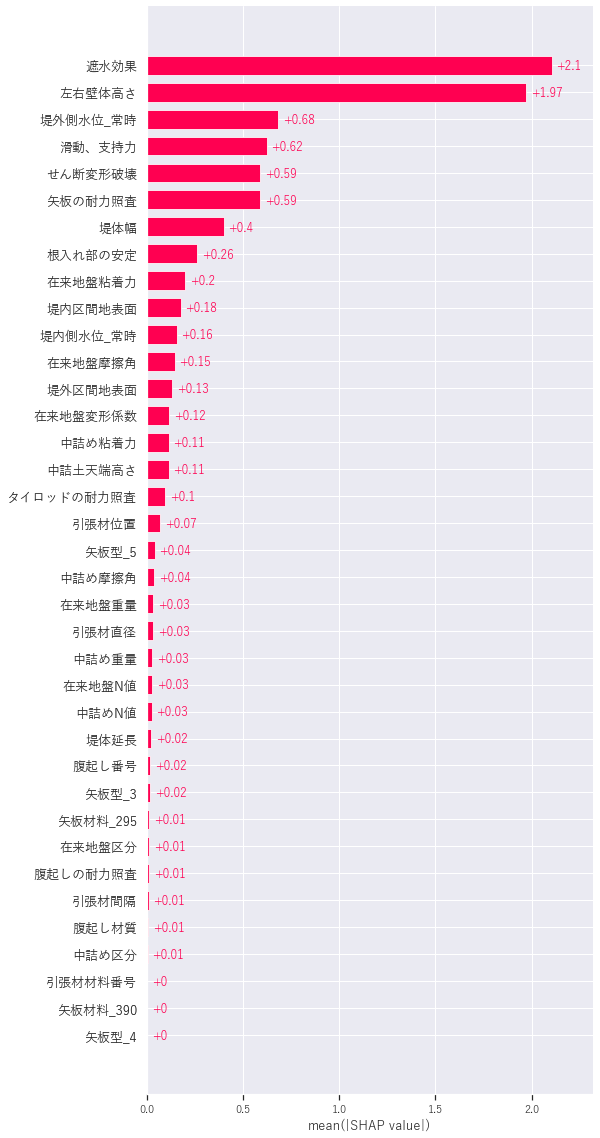

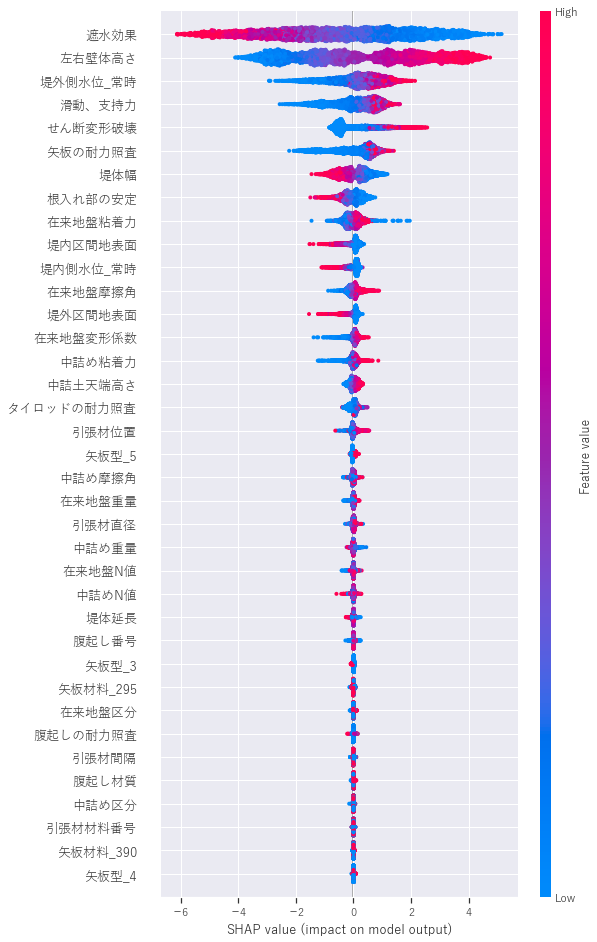

r2_train: 0.9558365180739108
r2_val: 0.7847816018600762
MAE_val:  1.207667091407776
[0]	validation_0-rmse:9.93570
[2]	validation_0-rmse:7.60051
[4]	validation_0-rmse:5.88950
[6]	validation_0-rmse:4.65351
[8]	validation_0-rmse:3.76334
[10]	validation_0-rmse:3.15093
[12]	validation_0-rmse:2.73587
[14]	validation_0-rmse:2.47437
[16]	validation_0-rmse:2.28979
[18]	validation_0-rmse:2.17297
[20]	validation_0-rmse:2.09414
[22]	validation_0-rmse:2.03999
[24]	validation_0-rmse:2.00828
[26]	validation_0-rmse:1.98065
[28]	validation_0-rmse:1.95275
[30]	validation_0-rmse:1.94014
[32]	validation_0-rmse:1.92144
[34]	validation_0-rmse:1.91146
[36]	validation_0-rmse:1.90474
[38]	validation_0-rmse:1.89836


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[40]	validation_0-rmse:1.89894
[42]	validation_0-rmse:1.88054
[44]	validation_0-rmse:1.87771
[46]	validation_0-rmse:1.86651
[48]	validation_0-rmse:1.86470
[50]	validation_0-rmse:1.85641
[52]	validation_0-rmse:1.84680
[54]	validation_0-rmse:1.84656
[56]	validation_0-rmse:1.84400
[58]	validation_0-rmse:1.84279
[60]	validation_0-rmse:1.83605
[62]	validation_0-rmse:1.83717
[64]	validation_0-rmse:1.83477
[66]	validation_0-rmse:1.83176
[68]	validation_0-rmse:1.82429
[70]	validation_0-rmse:1.82243
[72]	validation_0-rmse:1.81779
[74]	validation_0-rmse:1.81592
[76]	validation_0-rmse:1.81390
[78]	validation_0-rmse:1.80801
[80]	validation_0-rmse:1.80357
[82]	validation_0-rmse:1.79927
[84]	validation_0-rmse:1.79671
[86]	validation_0-rmse:1.79415
[88]	validation_0-rmse:1.79199
[90]	validation_0-rmse:1.78862
[92]	validation_0-rmse:1.78913
[94]	validation_0-rmse:1.78721
[96]	validation_0-rmse:1.78552
[98]	validation_0-rmse:1.78480
[99]	validation_0-rmse:1.78234


 97%|=================== | 4829/4999 [00:15<00:00]       

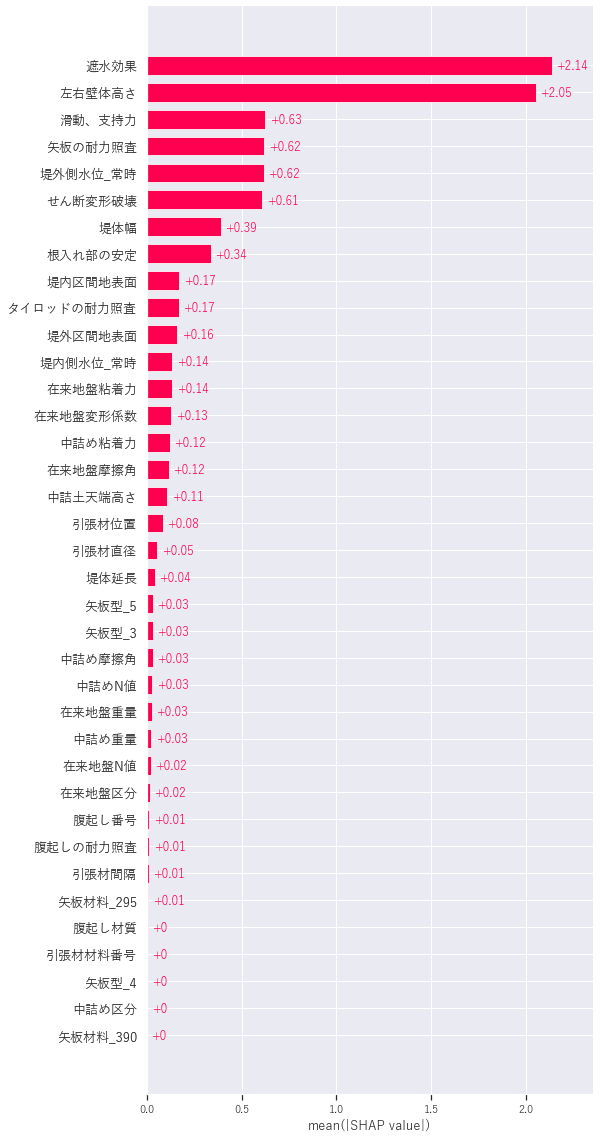

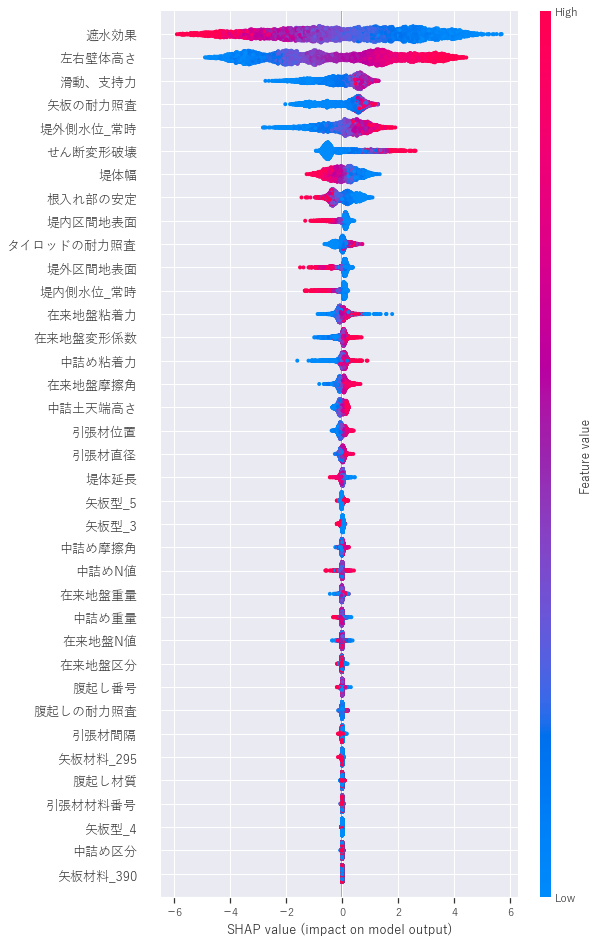

r2_train: 0.9552123754104127
r2_val: 0.7506999042822213
MAE_val:  1.3045722817993164
[0]	validation_0-rmse:9.88503
[2]	validation_0-rmse:7.57307
[4]	validation_0-rmse:5.88283
[6]	validation_0-rmse:4.65400
[8]	validation_0-rmse:3.78794
[10]	validation_0-rmse:3.18809
[12]	validation_0-rmse:2.79265
[14]	validation_0-rmse:2.51651
[16]	validation_0-rmse:2.34390
[18]	validation_0-rmse:2.22686
[20]	validation_0-rmse:2.14908
[22]	validation_0-rmse:2.10006
[24]	validation_0-rmse:2.06617
[26]	validation_0-rmse:2.03314
[28]	validation_0-rmse:2.01498
[30]	validation_0-rmse:1.99835
[32]	validation_0-rmse:1.98870
[34]	validation_0-rmse:1.97142
[36]	validation_0-rmse:1.96544
[38]	validation_0-rmse:1.96122
[40]	validation_0-rmse:1.95648
[42]	validation_0-rmse:1.95407
[44]	validation_0-rmse:1.93677
[46]	validation_0-rmse:1.93066
[48]	validation_0-rmse:1.92441
[50]	validation_0-rmse:1.91972
[52]	validation_0-rmse:1.91477
[54]	validation_0-rmse:1.90879


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[56]	validation_0-rmse:1.90291
[58]	validation_0-rmse:1.90132
[60]	validation_0-rmse:1.89595
[62]	validation_0-rmse:1.89162
[64]	validation_0-rmse:1.89091
[66]	validation_0-rmse:1.88802
[68]	validation_0-rmse:1.88425
[70]	validation_0-rmse:1.87950
[72]	validation_0-rmse:1.87934
[74]	validation_0-rmse:1.88078
[76]	validation_0-rmse:1.87712
[78]	validation_0-rmse:1.87277
[80]	validation_0-rmse:1.86825
[82]	validation_0-rmse:1.86611
[84]	validation_0-rmse:1.86534
[86]	validation_0-rmse:1.86309
[88]	validation_0-rmse:1.86416
[90]	validation_0-rmse:1.85988
[92]	validation_0-rmse:1.85922
[94]	validation_0-rmse:1.85738
[96]	validation_0-rmse:1.85436
[98]	validation_0-rmse:1.85006
[99]	validation_0-rmse:1.84944


 94%|=================== | 4680/5000 [00:15<00:01]       

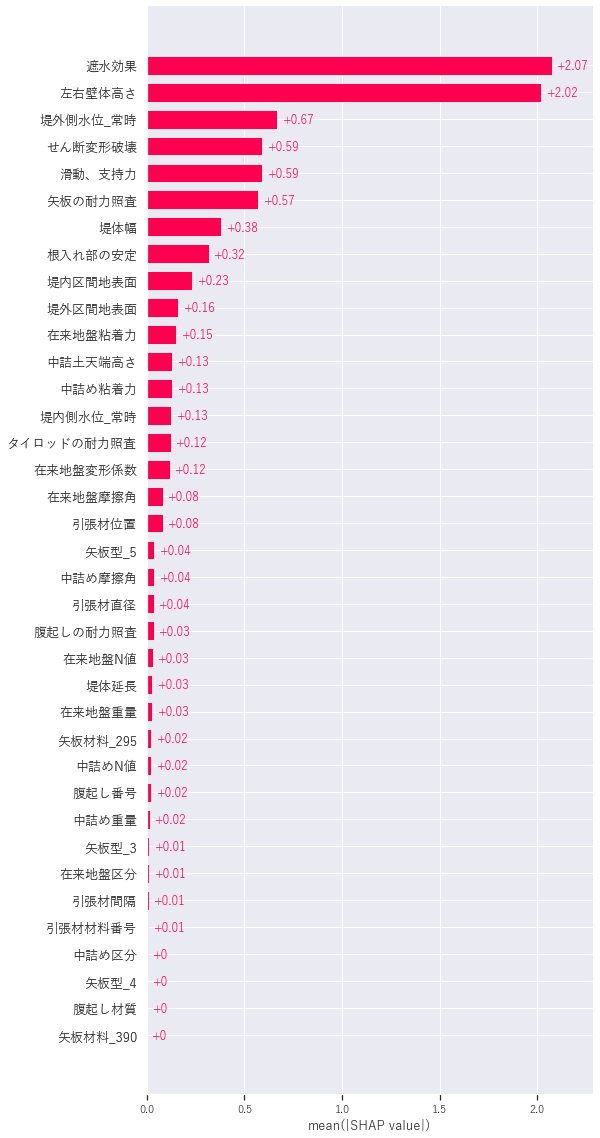

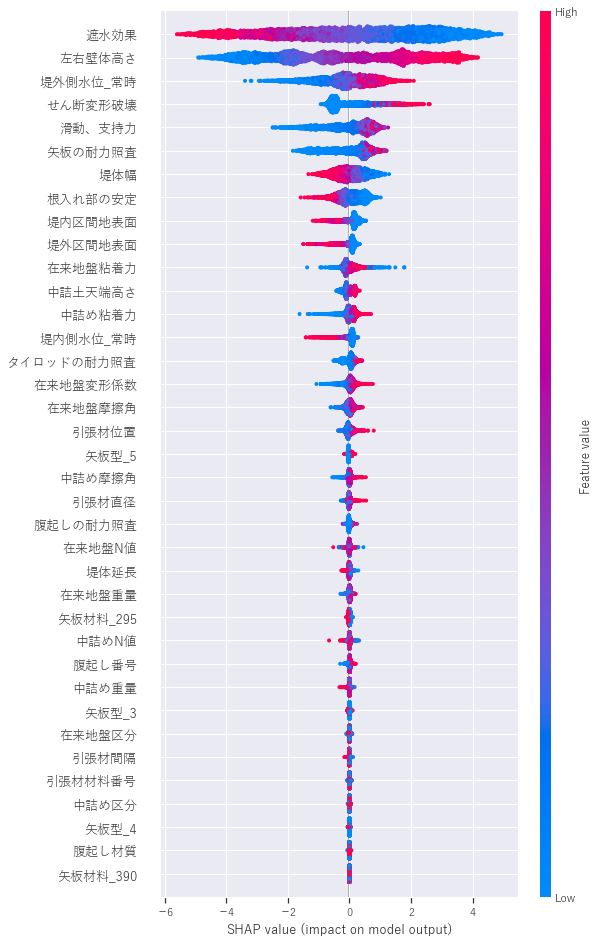

r2_train: 0.959380315531894
r2_val: 0.7396219819622993
MAE_val:  1.3444940271140862
平均のMAE：1.3001744561090813


In [22]:
oof,models = fit_xgb(X, y, kf_cv, xgb_params)

### テストデータ

In [23]:
X_test = test.drop([pur], axis=1)
y_test = test[pur]

In [24]:
# from sklearn.metrics import average_precision_score,mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error

def inference_xgb(models):
    # testデータに対して推論を行う
    X_test = test.drop([pur], axis=1)
    y_test = test[pur]

    pred_test = np.zeros((5,len(y_test))) # 320×6の2次元配列を作成
    r2 = []

    for i,model in enumerate(models):
        pred_test[i] = model.predict(X_test)/5
        r2.append(model.score(X_test, y_test))
    pred_test = np.sum(pred_test, axis=0) 

    print('MAE_test: ',mean_absolute_error(y_test, pred_test))
    print('r2_test_average:',np.mean(r2))

    return pred_test,X_test,y_test

In [25]:
pred_test,X_test,y_test = inference_xgb(models)

MAE_test:  1.2549445156754733
r2_test_average: 0.7564338785427787


### 全体の確認

In [26]:
train["predict"] = oof
train

,堤体延長,堤体幅,左右壁体高さ,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,中詰めN値,中詰め摩擦角,...,堤内側水位_常時,せん断変形破壊,滑動、支持力,根入れ部の安定,遮水効果,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査,矢板の全長,引張材位置,腹起し番号,矢板型_3,矢板型_4,矢板型_5,矢板材料_295,矢板材料_390,predict
6846,15,8.3,8.8,8.7,3.8,0.0,0.8,12,0,26,21,281,31900,16,1,9,3,...,0.0,0.206540,0.104348,0.054103,0.831354,0.127660,0.227273,0.014286,17.7,4.0,7,0,0,1,0,1,16.901913
2136,16,5.9,5.4,5.3,0.5,0.0,0.8,17,1,38,10,64,155000,13,0,14,14,...,0.0,0.029441,0.155844,0.057361,0.486111,0.025532,0.011628,0.007143,14.8,4.4,2,0,1,0,0,1,14.088346
6714,28,1.4,6.9,6.8,1.4,0.0,0.8,13,1,18,1,180,108000,20,1,5,24,...,0.0,1.224490,0.215054,0.065388,1.090343,0.153191,0.039216,0.010811,16.1,5.7,3,1,0,0,0,1,15.127873
8474,29,14.0,2.2,2.1,0.4,0.0,1.6,15,1,15,41,134,4900,11,0,2,15,...,0.0,0.013139,0.015576,0.017610,0.426829,0.016667,0.046512,0.021429,3.2,1.2,2,1,0,0,1,0,3.771874
8881,29,4.7,9.5,9.4,0.0,3.2,0.8,12,0,11,45,222,125800,20,1,27,3,...,2.5,0.001200,0.040706,0.021086,0.953678,0.017021,0.063830,0.007143,11.6,4.6,6,0,1,0,0,1,12.467075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7161,10,10.0,8.1,8.0,3.9,0.0,0.8,14,1,23,6,123,122500,20,1,15,31,...,0.0,0.105634,0.185471,0.124069,0.702811,0.466667,0.162791,0.151351,14.6,5.4,1,0,1,0,1,0,15.658981
2707,20,11.8,5.2,5.1,0.8,0.0,1.6,19,0,1,29,235,135300,18,0,34,39,...,0.0,0.001200,0.015353,0.001000,0.195859,0.011111,0.009804,0.005405,13.2,2.1,9,0,0,1,1,0,11.932471
6400,15,4.5,6.5,6.4,0.1,0.0,1.6,17,0,20,10,98,2700,19,1,5,5,...,0.0,0.681818,0.272727,0.163934,1.008646,1.022222,1.790698,0.414286,14.1,3.6,10,0,1,0,1,0,13.335843
1688,27,7.2,2.0,1.9,0.5,0.0,1.6,16,1,30,28,229,22900,15,0,36,12,...,0.0,0.001200,0.004849,0.001000,0.199203,0.005556,0.011628,0.005405,4.3,1.4,5,0,1,0,1,0,5.007458


In [27]:
test["predict"] = pred_test
test

,堤体延長,堤体幅,左右壁体高さ,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,中詰めN値,中詰め摩擦角,...,堤内側水位_常時,せん断変形破壊,滑動、支持力,根入れ部の安定,遮水効果,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査,矢板の全長,引張材位置,腹起し番号,矢板型_3,矢板型_4,矢板型_5,矢板材料_295,矢板材料_390,predict
8692,16,7.1,6.9,6.8,0.0,3.1,0.8,17,1,8,19,163,121300,16,1,49,8,...,0.2,0.001200,0.041537,0.016200,0.038602,0.000000,0.000000,0.000000,15.4,4.9,5,0,1,0,1,0,13.260500
6773,28,2.4,4.8,4.7,0.0,1.0,1.6,14,1,42,3,80,31900,18,1,6,28,...,0.4,0.001200,0.179910,0.029297,0.361944,0.005556,0.000000,0.007143,8.9,1.8,1,1,0,0,1,0,9.091529
451,13,2.1,5.7,5.6,0.0,1.4,1.6,18,0,36,22,263,20100,14,0,34,33,...,1.1,0.001200,0.058480,0.026864,0.555556,0.094444,0.069767,0.010811,15.6,4.2,7,1,0,0,1,0,13.124410
368,29,9.1,7.2,7.1,0.0,3.0,0.8,15,1,8,17,121,62700,12,1,27,8,...,0.7,0.001200,0.061193,0.034570,0.339476,0.000000,0.000000,0.000000,9.4,3.2,7,0,1,0,1,0,12.295863
1682,23,5.3,5.3,5.2,1.2,0.0,1.6,11,0,36,21,74,44400,16,1,29,10,...,0.0,0.104803,0.244898,0.130435,0.702811,0.072222,0.081395,0.028571,13.5,4.9,5,0,0,1,1,0,12.992687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,22,8.3,9.8,9.7,0.0,2.2,1.6,13,1,24,37,70,39000,14,0,30,34,...,0.7,0.001200,0.126316,0.056243,0.523169,0.177778,0.393617,0.108108,19.6,5.6,3,1,0,0,1,0,17.627730
7268,28,4.5,3.9,3.8,1.1,0.0,1.6,11,1,9,16,292,130600,15,1,1,36,...,0.0,0.012066,0.017167,0.001000,0.241379,0.017021,0.011628,0.005405,12.7,1.5,9,1,0,0,0,1,12.116469
1930,21,11.5,7.5,7.4,0.0,3.0,1.6,17,1,34,2,151,115000,20,1,40,31,...,1.1,0.001200,0.160214,0.050437,0.546022,0.005556,0.000000,0.007143,8.9,4.6,4,0,0,1,1,0,11.840201
8397,15,5.2,2.6,2.5,0.0,0.0,0.8,15,1,23,4,128,27300,17,0,2,3,...,0.0,0.011053,0.058083,0.027194,0.664137,0.033333,0.039216,0.007143,5.8,1.4,5,0,1,0,1,0,5.989262


In [28]:
df_pred = pd.concat([train,test])
df_pred = df_pred.sort_index()
df_pred

,堤体延長,堤体幅,左右壁体高さ,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,中詰めN値,中詰め摩擦角,...,堤内側水位_常時,せん断変形破壊,滑動、支持力,根入れ部の安定,遮水効果,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査,矢板の全長,引張材位置,腹起し番号,矢板型_3,矢板型_4,矢板型_5,矢板材料_295,矢板材料_390,predict
0,20,5.7,4.0,3.9,0.0,0.0,1.6,12,1,7,24,165,179400,12,1,20,42,...,0.0,0.001200,0.016980,0.001000,0.030435,0.000000,0.000000,0.000000,6.9,0.5,6,1,0,0,0,1,10.549663
1,29,8.2,6.8,6.7,3.1,0.0,1.6,20,0,28,7,242,59700,13,0,43,28,...,0.0,0.027998,0.074074,0.049689,0.693069,0.055319,0.023256,0.010811,12.0,5.7,5,0,1,0,0,1,12.187477
2,23,13.3,9.7,9.6,0.0,0.8,1.6,18,1,27,7,136,139100,17,0,35,22,...,0.1,0.237154,0.195440,0.236220,1.250000,0.353191,1.818182,0.614286,13.3,7.1,1,0,0,1,0,1,13.714604
3,13,10.6,8.5,8.4,0.0,1.0,1.6,12,0,11,21,272,118900,15,1,42,34,...,0.2,0.001200,0.030083,0.020192,0.360825,0.005556,0.000000,0.000000,12.4,4.9,3,1,0,0,1,0,13.681001
4,17,11.8,5.9,5.8,0.0,0.9,0.8,16,0,21,35,10,59000,15,0,2,27,...,0.4,0.070217,0.268456,0.235756,0.498575,0.046809,0.078431,0.016216,15.7,2.7,2,1,0,0,0,1,13.324708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,25,9.2,8.1,8.0,2.3,0.0,1.6,18,1,38,12,96,75100,13,0,1,43,...,0.0,0.004561,0.033315,0.015364,0.250896,0.038298,0.000000,0.000000,10.9,7.5,4,1,0,0,1,0,14.013743
8924,29,10.4,5.4,5.3,1.5,0.0,0.8,12,1,48,26,134,15200,14,1,12,36,...,0.0,0.004561,0.033315,0.015364,0.250896,0.038298,0.000000,0.000000,14.1,4.3,3,1,0,0,0,1,12.533414
8925,19,7.7,4.2,4.1,1.6,0.0,1.6,15,0,32,40,270,194100,11,1,19,3,...,0.0,0.020281,0.027162,0.014428,0.384615,0.022222,0.023256,0.007143,13.2,3.0,6,0,1,0,1,0,13.310494
8926,11,11.5,4.3,4.2,1.6,0.0,0.8,18,1,12,37,85,14400,12,1,2,26,...,0.0,0.011119,0.048622,0.019118,0.371156,0.066667,0.078431,0.014286,11.9,2.0,4,0,0,1,1,0,11.874517


## 予測結果の可視化

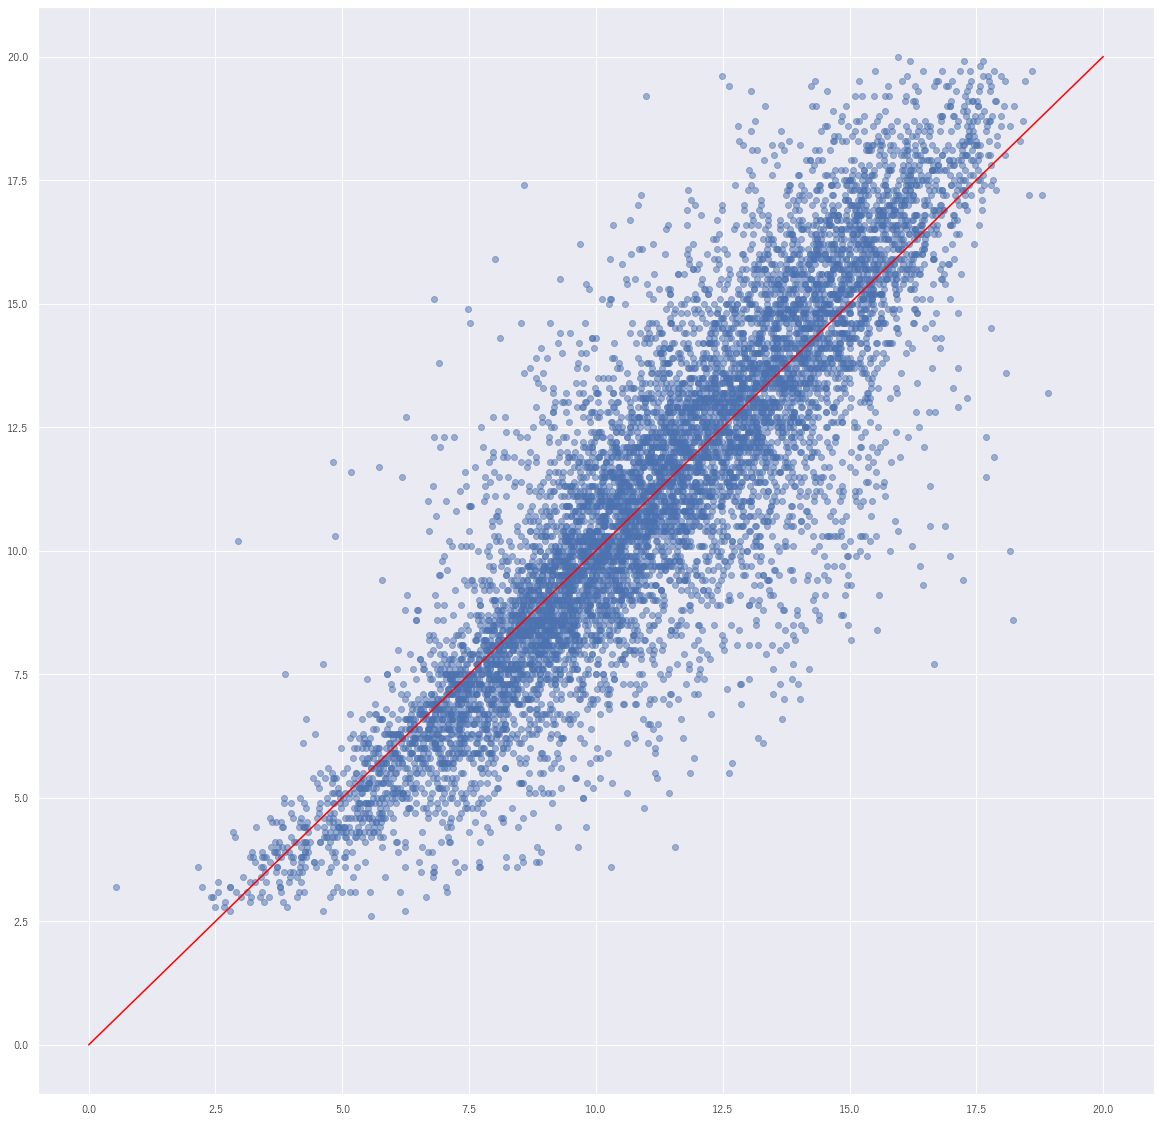

In [29]:
#x軸が予測値，y軸が結果
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(df_pred["predict"],df_pred[pur], alpha = 0.5)
plt.plot(np.linspace(0, 20, 100), np.linspace(0, 20, 100), "red")
plt.show()

###  特徴量重要度

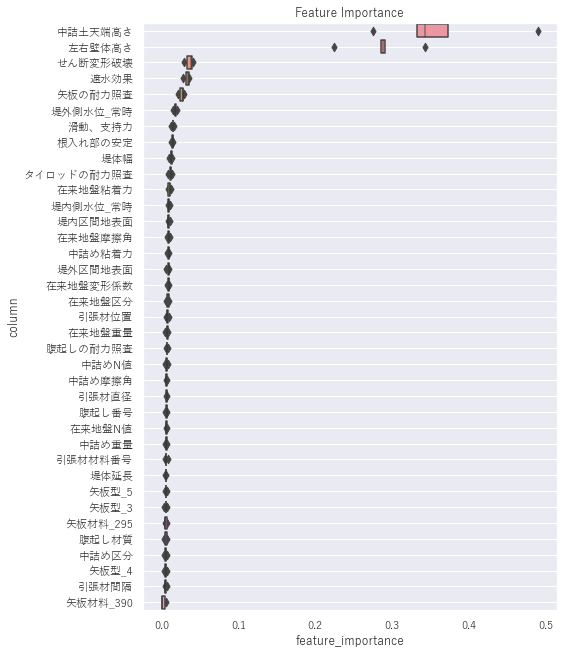

In [30]:
# 5つのモデルで重要度が出てくるので箱ひげ図にします、
def plot_importance(model, X):
    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df["feature_importance"] = model.feature_importances_
        _df["column"] = X.columns
        _df["fold"] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df], 
                                          axis=0, ignore_index=True)

    order = feature_importance_df.groupby("column").sum()[["feature_importance"]].sort_values("feature_importance", ascending=False).index[:50]

    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df, 
                  x="feature_importance", 
                  y="column", 
                  order=order, 
                  ax=ax, 
                  palette=None,  
                  orient="h")
    ax.tick_params(axis="x")
    ax.set_title("Feature Importance")
    ax.grid()
    fig.tight_layout()
    return fig, ax

fig, ax = plot_importance(models, X)

### shap値個々の値についてしらべる

In [64]:
def shap_part(val):
    X_predict = df_pred.drop([pur,"predict"], axis=1)
    y_predict = df_pred[pur] 

    for model in models:
        explainer = shap.TreeExplainer(model = model,data=X_predict,feature_perturbation="interventional")
        shap_values = explainer(X_predict)
        shap.plots.waterfall(shap_values=shap_values[val],max_display=20)

 99%|===================| 8834/8928 [00:27<00:00]        

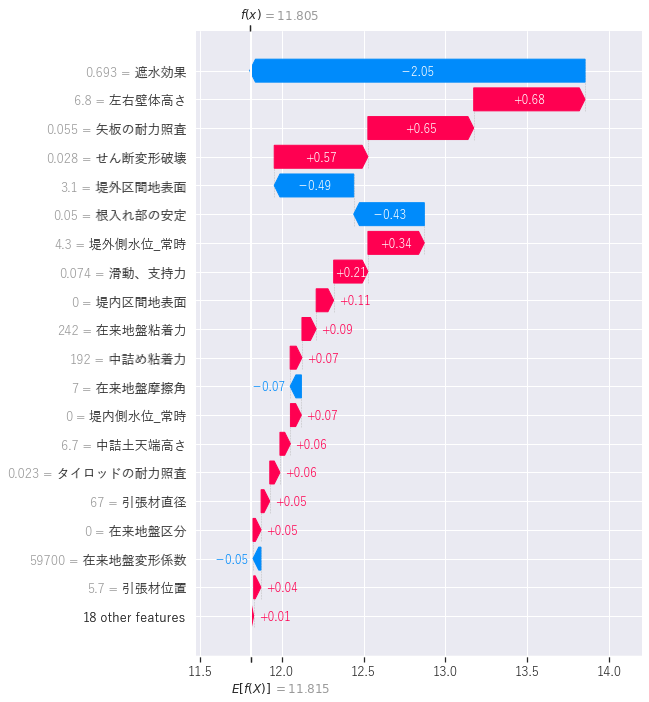

 97%|=================== | 8687/8928 [00:26<00:00]       

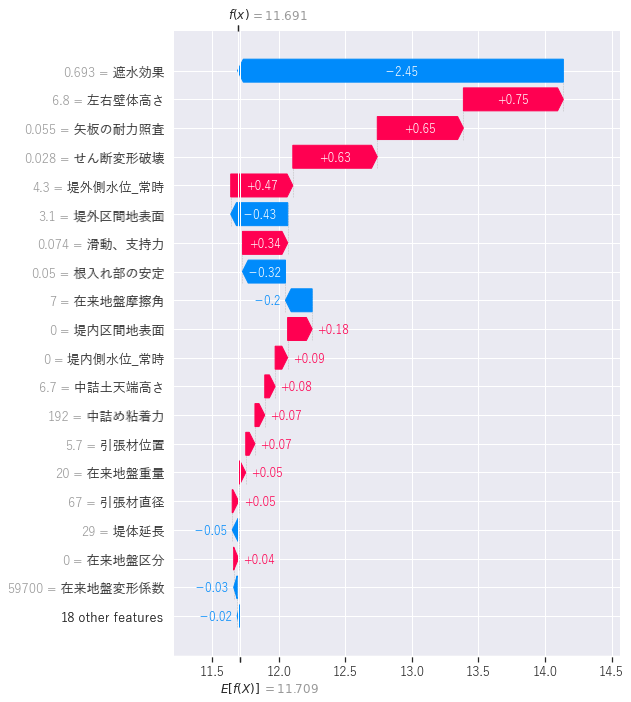

 97%|=================== | 8618/8928 [00:26<00:00]       

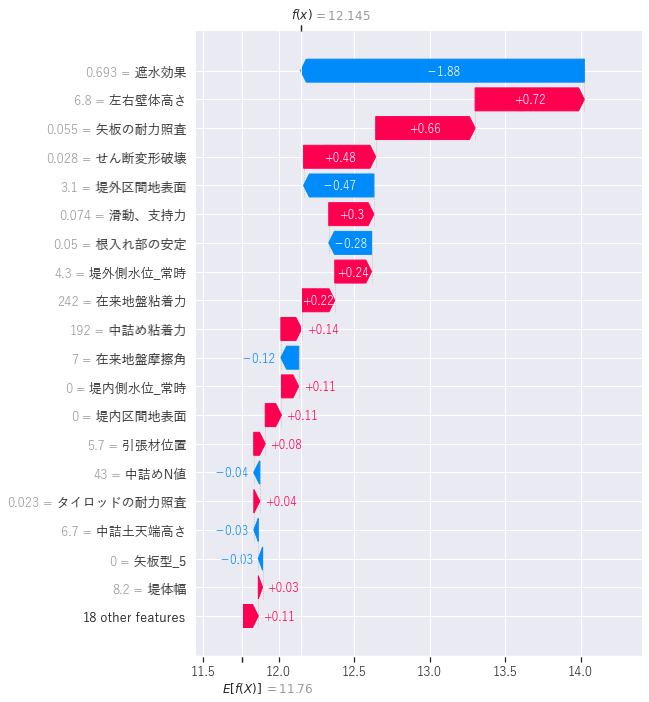

 97%|=================== | 8636/8928 [00:26<00:00]       

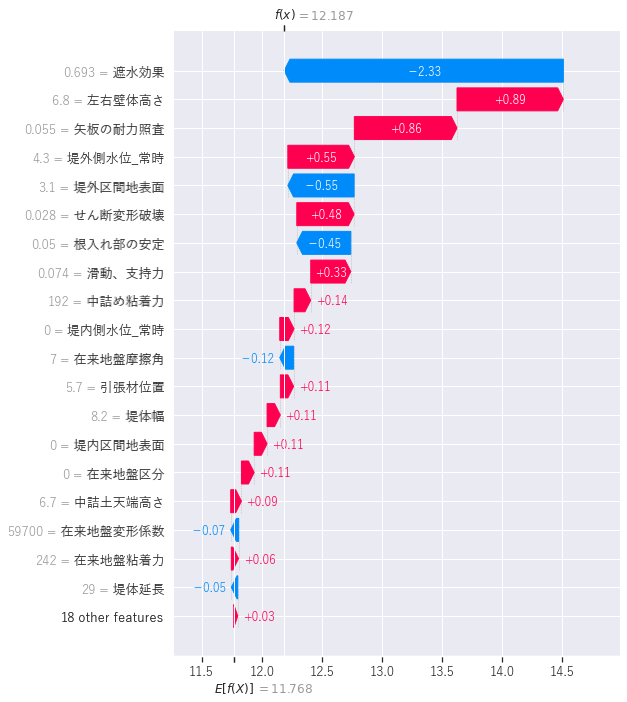

 97%|=================== | 8639/8928 [00:26<00:00]       

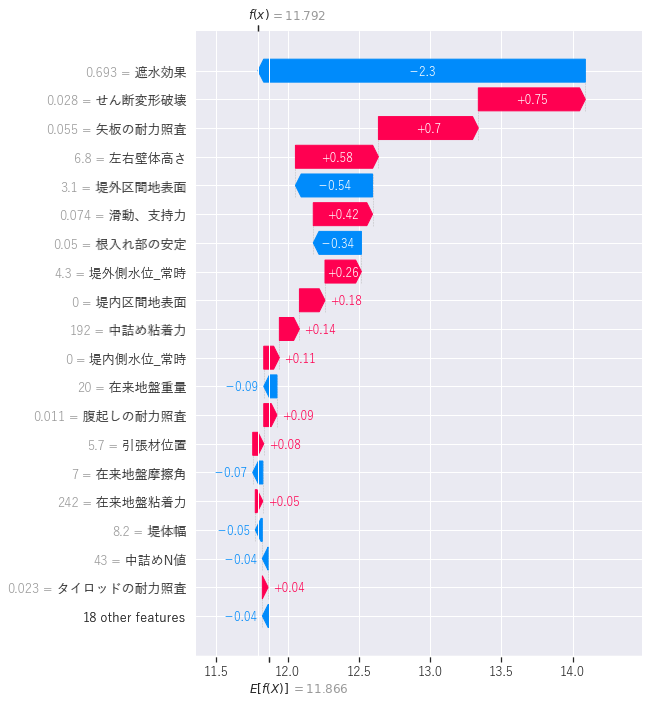

In [65]:
#引数にはデータの何番目の値の詳細を見たいかをいれる．
#モデルごとにwaterfall図が出る．モデルによって異なる．
#f(x):モデルの予測値
#E[f(x)]:モデル予測値全体の平均
shap_part(1)